In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# data_gen
raw_data = []

for i in range(0, 9):
  raw_data.append(np.loadtxt(f'data/surface_adsorption/0{i + 1}.txt', skiprows=1, delimiter=',').T[1])

data = []

for _raw_data in raw_data:
  _temp = []
  _min = np.min(_raw_data)
  for i in range(0, len(_raw_data)):
    if (
      _raw_data[i] - _min <= 10
      and i != 0
      and i != len(_raw_data) - 1
      and _raw_data[i] < _raw_data[i - 1]
      and _raw_data[i] < _raw_data[i + 1]
    ):
      _temp.append(_raw_data[i])
  data.append(_temp)

print('data length:', end=' ')
for d in data:
  print(len(d), end=' ')

data length: 38 40 14 31 22 24 27 33 30 

In [3]:
avg = [np.mean(d) for d in data]

print('avg pressure:', avg)

concentration = [0, 0.025, 0.0429, 0.0875, 0.1222, 0.15, 0.2, 0.2333, 0.275]

print('concentration:', concentration)

ln_concentration = [np.log(c) for c in concentration[1:]]

T = 30 + 273.15  # K
R = 8.314  # J/(mol*K)

gamma_water = 71.18  # mN/m
K = gamma_water / avg[0]

gamma = [K * a for a in avg]

gamma_ = gamma[1:]

avg pressure: [-336.13157894736844, -316.45, -296.85714285714283, -268.0, -254.63636363636363, -244.08333333333334, -230.7037037037037, -212.5151515151515, -200.7]
concentration: [0, 0.025, 0.0429, 0.0875, 0.1222, 0.15, 0.2, 0.2333, 0.275]


slope: -9.861926808732692
intercept: 31.842503127525525
r2: 0.9751914115180143
Gamma_inf: 3.912859e-06


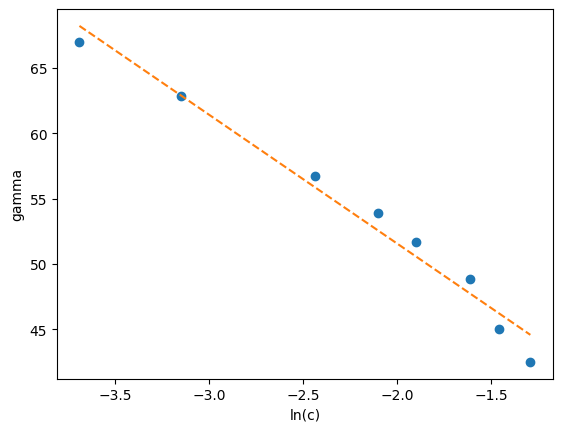

slope: -8.691199283132013
intercept: 35.29082630285117
r2: 0.9976533202423871
Gamma_inf: 3.448356e-06


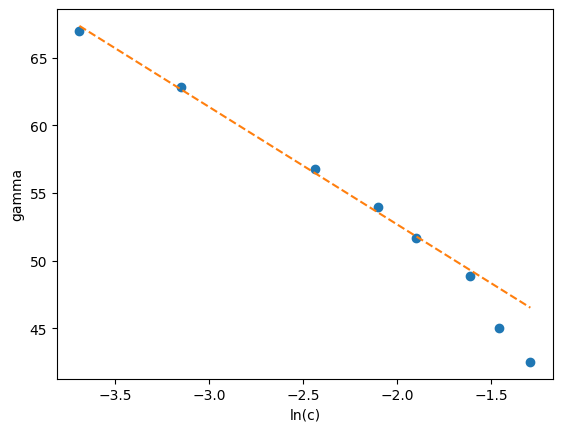

In [4]:
# linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(ln_concentration, gamma_)

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r2: {r_value**2}')

Gamma_inf = -slope / R / T * 1e-3
print(f'Gamma_inf: {Gamma_inf:e}')

_ln_c_new = np.linspace(ln_concentration[0], ln_concentration[-1], 100)
_gamma_new = [slope * x + intercept for x in _ln_c_new]

# plot gamma-ln(c)
plt.plot(ln_concentration, gamma_, 'o')
plt.plot(_ln_c_new, _gamma_new, '--')
plt.xlabel('ln(c)')
plt.ylabel('gamma')
plt.show()

# without last two data points
_slope, _intercept, _r_value, _p_value, _std_err = st.linregress(ln_concentration[:-2], gamma_[:-2])

print(f'slope: {_slope}')
print(f'intercept: {_intercept}')
print(f'r2: {_r_value**2}')

_Gamma_inf = -_slope / R / T * 1e-3
print(f'Gamma_inf: {_Gamma_inf:e}')

__ln_c_new = np.linspace(ln_concentration[0], ln_concentration[-1], 100)
_gamma_new = [_slope * x + _intercept for x in __ln_c_new]

# plot gamma-ln(c)
plt.plot(ln_concentration, gamma_, 'o')
plt.plot(__ln_c_new, _gamma_new, '--')
plt.xlabel('ln(c)')
plt.ylabel('gamma')
plt.show()

intercept: 72.15657928187093
coefficients: [    0.          -245.21779679   986.41001849 -1786.06063125]
r2: 0.9962213958573266


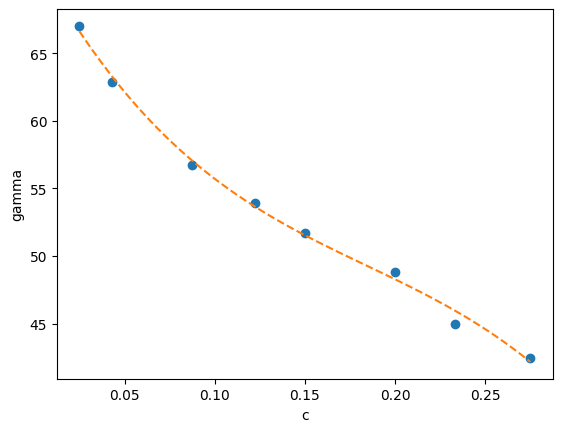

In [6]:
# plot gamma-c
# _c_new = [np.exp(x) for x in _ln_c_new]
# plt.plot(concentration[1:], gamma_, 'o')
# plt.plot(_c_new, _gamma_new, '--')
# plt.xlabel('c')
# plt.ylabel('gamma')
# plt.show()

# def dif(c):
#   return slope / c

# Z = [-slope / c for c in concentration[1:]]
# Gamma = [z / R / T * 1e-3 for z in Z]

# c_Gamma = []

# for i in range(0, len(concentration[1:])):
#   c_Gamma.append(concentration[1:][i] / Gamma[i])

# slope_, intercept_, r_value_, p_value_, std_err_ = st.linregress(concentration[1:], c_Gamma)
# print(f'slope: {slope_}')
# print(f'intercept: {intercept_}')
# print(f'r2: {r_value_**2}')

# c_new_ = np.linspace(concentration[1], concentration[-1], 100)
# c_Gamma_new_ = [slope_ * x + intercept_ for x in c_new_]

# Gamma_inf_ = 1 / slope_
# print(f'Gamma_inf: {Gamma_inf_:e}')

# plt.plot(concentration[1:], c_Gamma, 'o')
# plt.plot(c_new_, c_Gamma_new_, '--')
# plt.xlabel('c')
# plt.ylabel('c / Gamma')
# plt.show()

# claculate the error
# Gamma_inf_err = (Gamma_inf - Gamma_inf_) / Gamma_inf
# print(f'Gamma_inf_err: {Gamma_inf_err * 100}%')

poly = PolynomialFeatures(degree=3)
c_poly = poly.fit_transform(np.array(concentration[1:]).reshape(-1, 1))
model = LinearRegression()
model.fit(c_poly, gamma_)

print(f'intercept: {model.intercept_}')
print(f'coefficients: {model.coef_}')
print(f'r2: {model.score(c_poly, gamma_)}')

# coef_ = model.coef_
# dif_coef_ = [3 * coef_[1], 2 * coef_[2], coef_[3]]

# def clac_Z(c):
#   return - c * (dif_coef_[0] )

_c_new_ = np.linspace(concentration[1], concentration[-1], 100)
_gamma_new_ = model.predict(poly.fit_transform(np.array(_c_new_).reshape(-1, 1)))

# plot gamma-c
plt.plot(concentration[1:], gamma_, 'o')
plt.plot(_c_new_, _gamma_new_, '--')
plt.xlabel('c')
plt.ylabel('gamma')
plt.show()